In [1]:
import sys
from rdflib import Graph,URIRef
from gastrodon import LocalEndpoint,one,QName
import pandas as pd

In [2]:
g=Graph()
g.parse("../../../BGT-HIGH3/n247_wgs84.ttl",format="turtle")
len(g)

282939

In [3]:
e=LocalEndpoint(g)

In [5]:
q=e.select("""
    SELECT * { ?s ?p ?o .}
    limit 10
""")
q

,s,o,p
0,data:AD.4DCA874C4093428CB9BB01A2C079C608_fcl,AREAALDATA,adprop:CREATED_USER
1,data:AD.9E1FFC02949A43469559927CEDC64B1F_fcl,2019-12-17 13:01:18,adprop:LAST_EDITED_DATE
2,data:AD.A020566DEFC54A52A36850CCA9D63E80_fcl,2019-12-16 17:00:16,adprop:CREATED_DATE
3,data:AD.8F0A167C003F44F1990BD06D51A8300E_fcl,adwl:status_bestaand,adprop:STATUS_status
4,data:AD.6965A42F93E14DC0A3CCC81BD248931A_fcl,data:AD.6965A42F93E14DC0A3CCC81BD248931A_Multi...,geo:hasGeometry
5,data:AD.31A411A391A9462B8B6BF3E78EE04282_fcl,adwl:typeSpecOWE_OWGBermGroenvz,adprop:TYPESPEC_typeSpecOWE
6,data:AD.7A7554006454498DBF99C0FC88655340_fcl,{7516C794-6942-4B04-8971-2858248EC806},adprop:GLOBALID
7,data:AD.0CD1A51AD2134893BFD2C0D29E7AFFB6_fcl,adwl:jaNee_N,adprop:INONDERZOEK_jaNee
8,data:AD.0E6D85113779455295379DF07C8515E7_fcl,adwl:fysiekVoorkomenWGD_geslotenverhardingasfalt,adprop:FYSIEKVOORKOMEN_fysiekVoorkomenWGD
9,data:AD.46E489BCF3F149C8BA9C7DE98695CFE4_fcl,adwl:TYPE_BEHEER_MA2,adprop:TYPE_BEHEER_TYPE_BEHEER


In [6]:

predicates=e.select("""
    SELECT ?p (COUNT(*) AS ?count) { ?s ?p ?o .} GROUP BY ?p ORDER BY DESC(?count)
""")
predicates

,count
p,
rdf:type,16867
rdfs:label,16866
adprop:GLOBALID,8434
adprop:OBJECTID,8434
adprop:SHAPE_Length,8434
geo:asWKT,8434
geo:hasGeometry,8433
adprop:AD_ID,8433
adprop:VERWERKINGSSTATUS_VERWERKINGSSTATUS,8433


In [15]:
objects=e.select("""
   SELECT ?o (COUNT(*) AS ?cnt) {
      ?s rdf:type ?o .
      FILTER NOT EXISTS {
      FILTER regex(str(?o), "MultiPolygon") .
      }
   } GROUP BY ?o ORDER BY DESC(?cnt)
""")
objects

,cnt
o,
ad:wegdeel_v,2658
ad:ondersteunendWegdeel_v,2199
ad:ondersteunendWaterdeel_v,995
ad:waterdeel_v,637
ad:begroeidTerreindeelBerm_v,378
ad:onbegroeidTerreindeel_v,316
ad:begroeidTerreindeel_v,284
ad:kunstwerkdeel_v,243
sf:MultiLineString,201


Text(0,0.5,'')

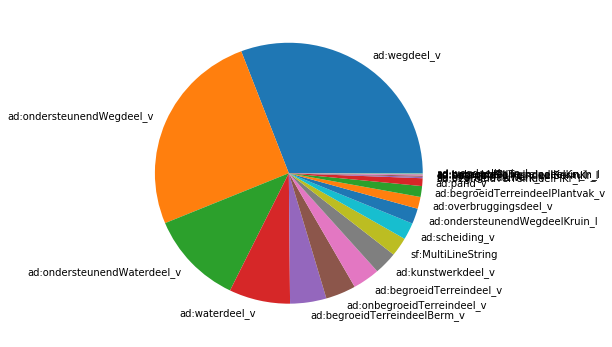

In [16]:

%matplotlib inline
objects["cnt"].plot.pie(figsize=(6,6)).set_ylabel('')